얼굴의 좌표 =  319 308 405 405


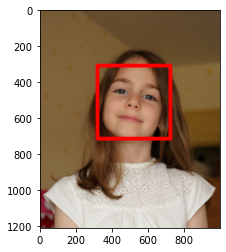

In [5]:
import matplotlib.pyplot as plt
import cv2

cascade_file = 'haarcascade_frontalface_alt.xml'
cascade = cv2.CascadeClassifier(cascade_file)

img = cv2.imread('girl.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_list = cascade.detectMultiScale(img_gray, minSize=(150, 150))
if len(face_list) == 0:
    print('실패')
    quit()

for (x, y, w, h) in face_list:
    print('얼굴의 좌표 = ', x, y, w, h)
    red = (0, 0, 255)
    cv2.rectangle(img, (x, y), (x+w, y+h), red, thickness=20)
    
cv2.imwrite('face-detect.png', img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

얼굴의 좌표 =  319 50 168 168


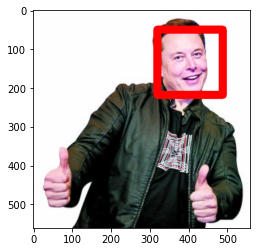

In [6]:
import matplotlib.pyplot as plt
import cv2

cascade_file = 'haarcascade_frontalface_alt.xml'
cascade = cv2.CascadeClassifier(cascade_file)

img = cv2.imread('mm.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_list = cascade.detectMultiScale(img_gray, minSize=(150, 150))
if len(face_list) == 0:
    print('실패')
    quit()

for (x, y, w, h) in face_list:
    print('얼굴의 좌표 = ', x, y, w, h)
    red = (0, 0, 255)
    cv2.rectangle(img, (x, y), (x+w, y+h), red, thickness=20)
    
cv2.imwrite('mm-detect.png', img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [16]:
import cv2

def mosaic(img, rect, size):
    (x1, y1, x2, y2) = rect
    w = x2 - x1
    h = y2 - y1
    i_rect = img[y1:y2, x1:x2]
    
    i_small = cv2.resize(i_rect, (size, size))
    i_mos = cv2.resize(i_small, (w, h), interpolation=cv2.INTER_AREA)
    
    img2 = img.copy()
    img2[y1:y2, x1:x2] = i_mos
    return img2

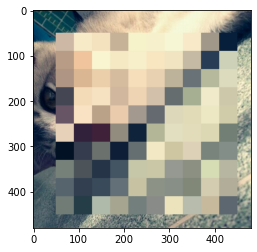

In [19]:
import matplotlib.pyplot as plt
import cv2
from mosaic import mosaic as mosaic


img = cv2.imread("cat.jpg")
mos = mosaic(img, (50, 50, 450, 450), 10)


cv2.imwrite("cat-mosaic.png", mos)
plt.imshow(cv2.cvtColor(mos, cv2.COLOR_BGR2RGB))
plt.show()



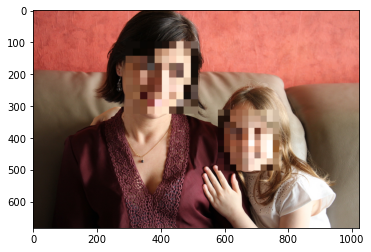

In [20]:
import matplotlib.pyplot as plt
import cv2
from mosaic import mosaic as mosaic

cascade_file = 'haarcascade_frontalface_alt.xml'
cascade = cv2.CascadeClassifier(cascade_file)

img = cv2.imread('family.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_list = cascade.detectMultiScale(img_gray, minSize=(150, 150))
if len(face_list) == 0:quit()

for (x, y, w, h) in face_list:
    img = mosaic(img, (x, y, x+w, y+h), 10)
    
cv2.imwrite('family-mosaic.png', img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
